In [1]:
import osmnx as ox 

In [2]:
ox.config(use_cache=True, log_console=True)

/var/folders/t6/8gnslc_j433220_1kgd9hv_c0000gn/T/ipykernel_19880/3742396485.py:1: UserWarning: The `utils.config` function is deprecated and will be removed in a future release. Instead, use the `settings` module directly to configure a global setting's value. For example, `ox.settings.log_console=True`.
  ox.config(use_cache=True, log_console=True)


            minx          miny           maxx          maxy
0  178672.953753  1.911362e+06  593859.677889  2.355328e+06


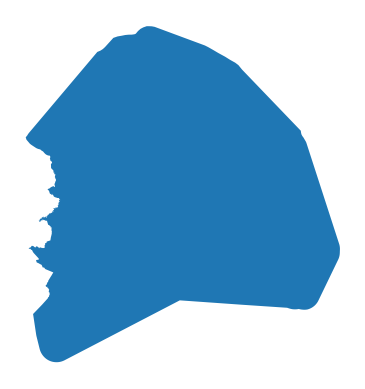

In [3]:
#Broward, Miami-Dade,  Monroe, Palm Beach
places = ox.geocode_to_gdf(['Dominica' ])
places = ox.project_gdf(places)
ax = places.plot()
_ = ax.axis('off')

print( places.bounds )

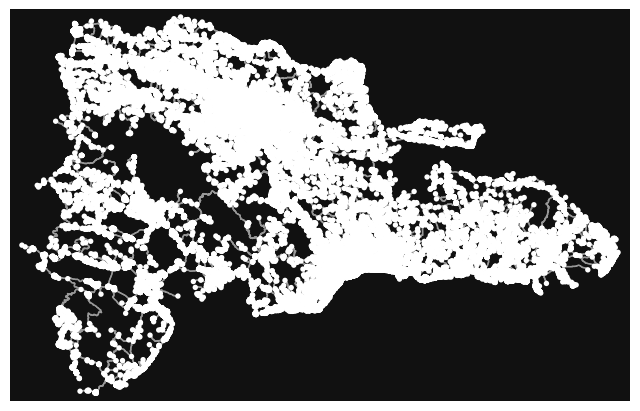

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [5]:
G_Dominica = ox.graph_from_place([ 'Dominica' ], network_type='drive')
ox.plot_graph( G_Dominica )

In [ ]:
G_Dominica = ox.project_graph(G_Dominica, to_crs='epsg:3087')

#G_Dominica.lanes.fillna(1)

In [ ]:
# convert graph to geodataframes
gdf_edges = ox.graph_to_gdfs( G_Dominica, nodes=False )
gdf_edges = ox.projection.project_gdf( gdf_edges , to_crs= 'epsg:3087' )


In [ ]:

# list of lats and lngs
lngs = gdf_edges.head().centroid.map(lambda x: x.coords[0][0])
lats = gdf_edges.head().centroid.map(lambda x: x.coords[0][1])

# the lat, lng at the spatial center of the graph
lng, lat = gdf_edges.unary_union.centroid.coords[0]
center_point = lat, lng


In [ ]:
print( lng, lat )
# find the nearest node to some point
center_node = ox.distance.nearest_nodes( G_SouthFlorida, lng, lat )
print( center_node )